In [1]:
import pandas as pd

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

## Loading Data into a Pandas DataFrame

In [2]:
df = pd.read_csv("./data/vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [5]:
df.describe(include=[object])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


## Analysis

### Questions that we have for the data:
* Which videogame had the highest sales in 2010?
* Which game genre is most popular in each year?
* What are the global sales per year?
* What are the sales trends per region over time?

In [8]:
twenty_ten_df = df[df["Year"] == 2010]

twenty_ten_df[twenty_ten_df["Global_Sales"] == twenty_ten_df["Global_Sales"].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.00,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [12]:
max_sales_by_year_df = df[["Year", "Global_Sales"]].groupby(by="Year", as_index=False).max()

max_sales_by_year_df.merge(df[["Year", "Global_Sales", "Name"]], on=["Year", "Global_Sales"], how="left")

,Year,Global_Sales,Name
0,1980.00,4.31,Asteroids
1,1981.00,4.50,Pitfall!
2,1982.00,7.81,Pac-Man
3,1983.00,3.20,Baseball
4,1984.00,28.31,Duck Hunt
5,1985.00,40.24,Super Mario Bros.
6,1986.00,6.51,The Legend of Zelda
7,1987.00,4.38,Zelda II: The Adventure of Link
8,1988.00,17.28,Super Mario Bros. 3
9,1989.00,30.26,Tetris


<Axes: title={'center': 'Global VG Sales Over the Years'}, xlabel='Year', ylabel='Sales (Millions $)'>

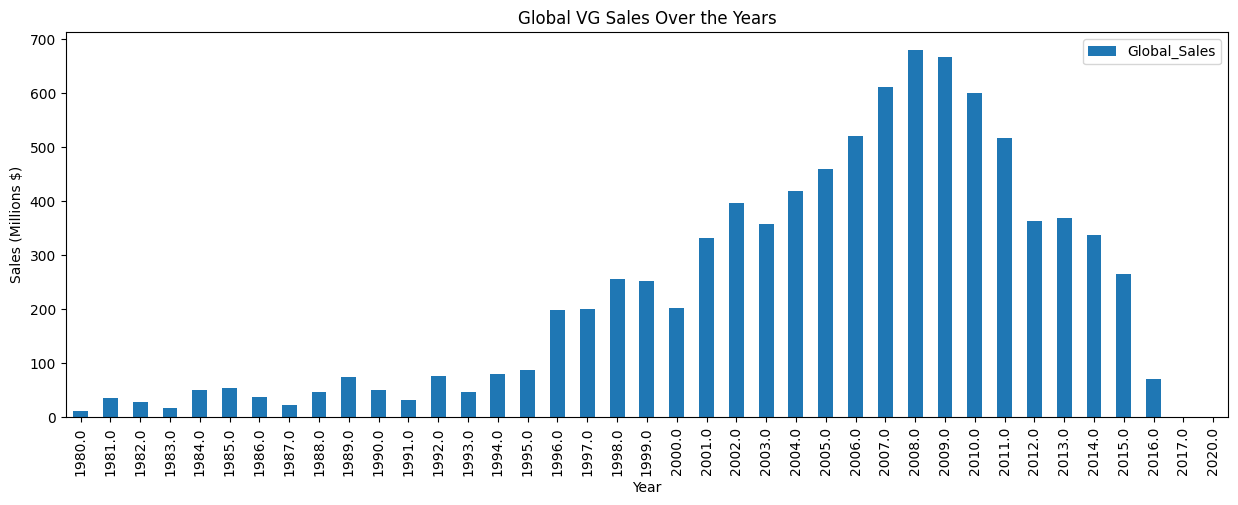

In [19]:
global_sales_per_year_df = df[["Year", "Global_Sales"]].groupby("Year", as_index=False).sum()

global_sales_per_year_df.plot(kind="bar", x="Year", y="Global_Sales", figsize=(15, 5), ylabel="Sales (Millions $)", title="Global VG Sales Over the Years")

<Axes: xlabel='Year'>

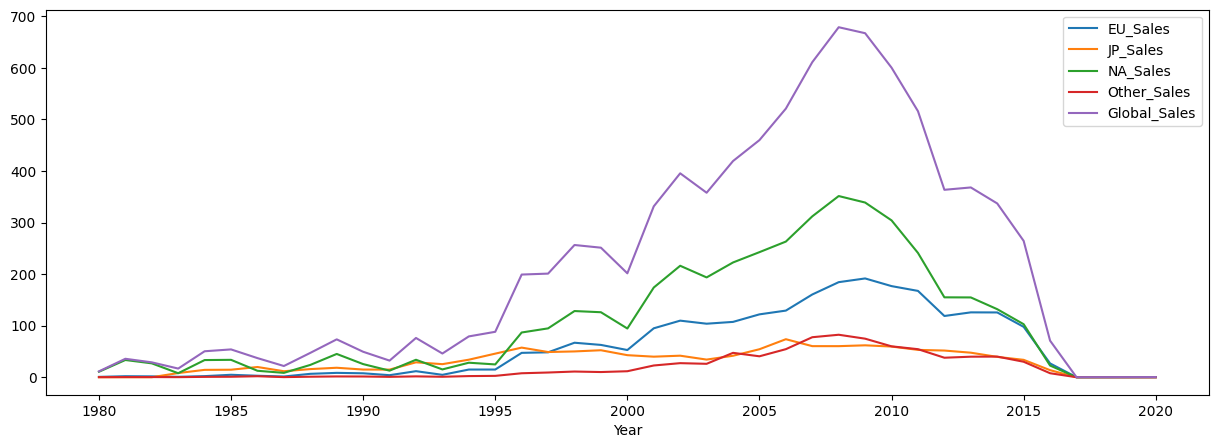

In [22]:
df[["Year", "EU_Sales", "JP_Sales", "NA_Sales", "Other_Sales", "Global_Sales"]].groupby(by="Year", as_index=False).sum().plot(x="Year", figsize=(15, 5))